<h1>Set up imports and connect to database</h1>

In [1]:
# Import the required libraries and open the connection to Mongo

import collections
import datetime
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 15) # Reset the base size of figures so they're large enough to be useful.

import pandas as pd

import folium

import pymongo
import re

In [2]:
# Open a connection to the Mongo server
client = pymongo.MongoClient('mongodb://localhost:27351/')

# Connect to the crimes database
crimes_db = client.crimes
street = crimes_db.street

<h2>Define functions</h2>

In [3]:
def results_to_table(results, index_name, column_name, results_name, 
                     fillna=None,
                     relabel_index=False, relabel_columns=False,
                     index_label=None, column_label=None):
    
    # Move items in dicts-of-dicts to the top level.
    def flatten(d):
        new_d = {}
        for k in d:
            if isinstance(d[k], dict):
                new_d.update(flatten(d[k]))
            else:
                new_d[k] = d[k]
        return new_d

    df = pd.DataFrame([flatten(r) for r in results])
    df = df.pivot(index=index_name, columns=column_name, values=results_name)
    
    # Optionally, fiddle with names and labels to make the DataFrame pretty.
    if not fillna is None:
        df.fillna(fillna, inplace=True)
    if relabel_columns:
        df.columns = [label_of[column_name, c] for c in df.columns]
    if relabel_index:
        df.index = [label_of[index_name, r] for r in df.index]
    if column_label:
        df.columns.name = column_label
    else:
        df.columns.name = column_name
    if index_label:
        df.index.name = index_label
    else:
        df.index.name = index_name
    return df

<h1>Exploring Database</h1>

In [4]:
street

Collection(Database(MongoClient(host=['localhost:27351'], document_class=dict, tz_aware=False, connect=True), 'crimes'), 'street')

In [5]:
street.find_one()

{'Crime type': 'Anti-social behaviour',
 'Falls within': 'Avon and Somerset Constabulary',
 'LSOA code': 'E01014399',
 'LSOA name': 'Bath and North East Somerset 001A',
 'Latitude': 51.416137,
 'Location': 'On or near St Francis Road',
 'Longitude': -2.509126,
 'Month': '2017-06',
 'Reported by': 'Avon and Somerset Constabulary',
 '_id': ObjectId('5c87bb1670b03fd7e8fb47b7'),
 'date': datetime.datetime(2017, 6, 30, 0, 0),
 'loc': {'coordinates': [-2.509126, 51.416137], 'type': 'Point'}}

In [6]:
# ensure the right number of records 6596750 <--- important number
street.count()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


6596750

In [7]:
type(street.find_one())

dict

<h3>Finding discrete values</h3>

In [8]:
list(street.distinct('Reported by'))

['Avon and Somerset Constabulary',
 'Bedfordshire Police',
 'British Transport Police',
 'Cambridgeshire Constabulary',
 'Cheshire Constabulary',
 'City of London Police',
 'Cleveland Police',
 'Cumbria Constabulary',
 'Derbyshire Constabulary',
 'Devon & Cornwall Police',
 'Dorset Police',
 'Durham Constabulary',
 'Dyfed-Powys Police',
 'Essex Police',
 'Gloucestershire Constabulary',
 'Greater Manchester Police',
 'Gwent Police',
 'Hampshire Constabulary',
 'Hertfordshire Constabulary',
 'Humberside Police',
 'Kent Police',
 'Lancashire Constabulary',
 'Leicestershire Police',
 'Lincolnshire Police',
 'Merseyside Police',
 'Metropolitan Police Service',
 'Norfolk Constabulary',
 'North Wales Police',
 'North Yorkshire Police',
 'Northamptonshire Police',
 'Police Service of Northern Ireland',
 'Northumbria Police',
 'Nottinghamshire Police',
 'South Wales Police',
 'South Yorkshire Police',
 'Staffordshire Police',
 'Suffolk Constabulary',
 'Surrey Police',
 'Sussex Police',
 'Thames

In [9]:
list(street.distinct('Last outcome category'))

['Investigation complete; no suspect identified',
 'Status update unavailable',
 'Local resolution',
 'Unable to prosecute suspect',
 'Court result unavailable',
 'Awaiting court outcome',
 'Formal action is not in the public interest',
 'Defendant found not guilty',
 'Offender given conditional discharge',
 'Offender fined',
 'Offender given a caution',
 'Court case unable to proceed',
 'Further investigation is not in the public interest',
 'Offender given suspended prison sentence',
 'Suspect charged as part of another case',
 'Offender given penalty notice',
 'Offender sent to prison',
 'Offender otherwise dealt with',
 'Offender given community sentence',
 'Offender given a drugs possession warning',
 'Offender deprived of property',
 'Action to be taken by another organisation',
 'Offender ordered to pay compensation',
 'Offender given absolute discharge',
 'Defendant sent to Crown Court',
 'Under investigation']

In [10]:
list(street.distinct('Crime type'))

['Anti-social behaviour',
 'Burglary',
 'Other theft',
 'Public order',
 'Violence and sexual offences',
 'Criminal damage and arson',
 'Shoplifting',
 'Vehicle crime',
 'Bicycle theft',
 'Drugs',
 'Other crime',
 'Possession of weapons',
 'Robbery',
 'Theft from the person']

In [11]:
list(street.distinct('Month'))

['2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05']

In [12]:
list(street.distinct('Last outcome category'))

['Investigation complete; no suspect identified',
 'Status update unavailable',
 'Local resolution',
 'Unable to prosecute suspect',
 'Court result unavailable',
 'Awaiting court outcome',
 'Formal action is not in the public interest',
 'Defendant found not guilty',
 'Offender given conditional discharge',
 'Offender fined',
 'Offender given a caution',
 'Court case unable to proceed',
 'Further investigation is not in the public interest',
 'Offender given suspended prison sentence',
 'Suspect charged as part of another case',
 'Offender given penalty notice',
 'Offender sent to prison',
 'Offender otherwise dealt with',
 'Offender given community sentence',
 'Offender given a drugs possession warning',
 'Offender deprived of property',
 'Action to be taken by another organisation',
 'Offender ordered to pay compensation',
 'Offender given absolute discharge',
 'Defendant sent to Crown Court',
 'Under investigation']

<h3>Exploritory queries</h3>

In [13]:
## complex aggregate query including a count
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Crime type': "Burglary"}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Last outcome category', 
                        'count': 
                         { '$sum': 1}}
                        }
     ])
    )
)

[{'_id': 'Under investigation', 'count': 784},
 {'_id': 'Offender fined', 'count': 2},
 {'_id': 'Defendant sent to Crown Court', 'count': 2},
 {'_id': 'Court case unable to proceed', 'count': 7},
 {'_id': 'Formal action is not in the public interest', 'count': 5},
 {'_id': 'Action to be taken by another organisation', 'count': 1},
 {'_id': 'Offender given a caution', 'count': 3},
 {'_id': 'Court result unavailable', 'count': 15},
 {'_id': 'Offender given community sentence', 'count': 15},
 {'_id': 'Investigation complete; no suspect identified', 'count': 1973},
 {'_id': 'Defendant found not guilty', 'count': 8},
 {'_id': 'Offender sent to prison', 'count': 38},
 {'_id': 'Local resolution', 'count': 10},
 {'_id': 'Offender given suspended prison sentence', 'count': 6},
 {'_id': 'Status update unavailable', 'count': 602},
 {'_id': 'Unable to prosecute suspect', 'count': 174},
 {'_id': 'Awaiting court outcome', 'count': 42}]

In [14]:
## simple list 
list(street.find({'Reported by': 'Avon and Somerset Constabulary'}))

[{'Crime type': 'Anti-social behaviour',
  'Falls within': 'Avon and Somerset Constabulary',
  'LSOA code': 'E01014399',
  'LSOA name': 'Bath and North East Somerset 001A',
  'Latitude': 51.416137,
  'Location': 'On or near St Francis Road',
  'Longitude': -2.509126,
  'Month': '2017-06',
  'Reported by': 'Avon and Somerset Constabulary',
  '_id': ObjectId('5c87bb1670b03fd7e8fb47b7'),
  'date': datetime.datetime(2017, 6, 30, 0, 0),
  'loc': {'coordinates': [-2.509126, 51.416137], 'type': 'Point'}},
 {'Crime ID': '872dcbe912d0ce8daf88fe9c422da8e2f876e2cb24dab29ebc743f9ac3417a0d',
  'Crime type': 'Burglary',
  'Falls within': 'Avon and Somerset Constabulary',
  'LSOA code': 'E01014399',
  'LSOA name': 'Bath and North East Somerset 001A',
  'Last outcome category': 'Investigation complete; no suspect identified',
  'Latitude': 51.422132,
  'Location': 'On or near Cross Street',
  'Longitude': -2.495055,
  'Month': '2017-06',
  'Reported by': 'Avon and Somerset Constabulary',
  '_id': Obje

In [15]:
## and list
list(street.find({'Reported by': 'Avon and Somerset Constabulary', 'Month' : '2017-06'}))

[{'Crime type': 'Anti-social behaviour',
  'Falls within': 'Avon and Somerset Constabulary',
  'LSOA code': 'E01014399',
  'LSOA name': 'Bath and North East Somerset 001A',
  'Latitude': 51.416137,
  'Location': 'On or near St Francis Road',
  'Longitude': -2.509126,
  'Month': '2017-06',
  'Reported by': 'Avon and Somerset Constabulary',
  '_id': ObjectId('5c87bb1670b03fd7e8fb47b7'),
  'date': datetime.datetime(2017, 6, 30, 0, 0),
  'loc': {'coordinates': [-2.509126, 51.416137], 'type': 'Point'}},
 {'Crime ID': '872dcbe912d0ce8daf88fe9c422da8e2f876e2cb24dab29ebc743f9ac3417a0d',
  'Crime type': 'Burglary',
  'Falls within': 'Avon and Somerset Constabulary',
  'LSOA code': 'E01014399',
  'LSOA name': 'Bath and North East Somerset 001A',
  'Last outcome category': 'Investigation complete; no suspect identified',
  'Latitude': 51.422132,
  'Location': 'On or near Cross Street',
  'Longitude': -2.495055,
  'Month': '2017-06',
  'Reported by': 'Avon and Somerset Constabulary',
  '_id': Obje

In [16]:
## complex aggregate query including a count
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-06'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count': 
                         { '$sum': 1}}
                        }
     ])
    )
)

[{'_id': 'Possession of weapons', 'count': 19},
 {'_id': 'Drugs', 'count': 130},
 {'_id': 'Anti-social behaviour', 'count': 2564},
 {'_id': 'Public order', 'count': 153},
 {'_id': 'Criminal damage and arson', 'count': 472},
 {'_id': 'Robbery', 'count': 13},
 {'_id': 'Vehicle crime', 'count': 212},
 {'_id': 'Burglary', 'count': 333},
 {'_id': 'Other crime', 'count': 68},
 {'_id': 'Violence and sexual offences', 'count': 992},
 {'_id': 'Other theft', 'count': 382},
 {'_id': 'Theft from the person', 'count': 26},
 {'_id': 'Bicycle theft', 'count': 109},
 {'_id': 'Shoplifting', 'count': 343}]

<h1>Sample data from Database into Dataframe</h1>

In [17]:
## complex aggregate query including a count
df01 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-06'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-06': 
                         { '$sum': 1}}
                        }
     ])
    )
))

In [18]:
df01

,_id,count 2017-06
0,Possession of weapons,19
1,Drugs,130
2,Anti-social behaviour,2564
3,Public order,153
4,Criminal damage and arson,472
5,Robbery,13
6,Vehicle crime,212
7,Burglary,333
8,Other crime,68
9,Violence and sexual offences,992


In [19]:
df02 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-07'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-07': 
                         { '$sum': 1}}
                        }
     ])
    )
))


In [20]:
df02

,_id,count 2017-07
0,Possession of weapons,18
1,Bicycle theft,107
2,Theft from the person,41
3,Burglary,310
4,Other crime,57
5,Criminal damage and arson,511
6,Anti-social behaviour,2781
7,Public order,127
8,Shoplifting,401
9,Robbery,12


<h1>Reshape sample data ready to merge into final Dataframe</h1>

In [21]:
df02.columns=['Offence','2017-07']

In [22]:
df02.set_index('Offence', inplace=True)

In [23]:
df02.sort_index(axis=0,inplace=True)

In [24]:
df02

,2017-07
Offence,
Anti-social behaviour,2781
Bicycle theft,107
Burglary,310
Criminal damage and arson,511
Drugs,136
Other crime,57
Other theft,439
Possession of weapons,18
Public order,127


In [25]:
df01.columns=['Offence','2017-06']
df01.set_index('Offence', inplace=True)
df01.sort_index(axis=0,inplace=True)
df01

,2017-06
Offence,
Anti-social behaviour,2564
Bicycle theft,109
Burglary,333
Criminal damage and arson,472
Drugs,130
Other crime,68
Other theft,382
Possession of weapons,19
Public order,153


<h1>Merge sample dataframes into a single dataframe using inner join</h1>

In [26]:
df= pd.concat([df01,df02],axis=1,join='inner')

<h3>Review dataframe</h3>

In [27]:
df

,2017-06,2017-07
Offence,,
Anti-social behaviour,2564,2781
Bicycle theft,109,107
Burglary,333,310
Criminal damage and arson,472,511
Drugs,130,136
Other crime,68,57
Other theft,382,439
Possession of weapons,19,18
Public order,153,127


<h1>Sample in the rest of the data</h1>

In [28]:
df03 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-08'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-08': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df03.columns=['Offence','2017-08']
df03.set_index('Offence', inplace=True)
df03.sort_index(axis=0,inplace=True)
df03

,2017-08
Offence,
Anti-social behaviour,2655
Bicycle theft,102
Burglary,283
Criminal damage and arson,549
Drugs,128
Other crime,44
Other theft,411
Possession of weapons,20
Public order,131


In [29]:
df04 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-09'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-09': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df04.columns=['Offence','2017-09']
df04.set_index('Offence', inplace=True)
df04.sort_index(axis=0,inplace=True)
df04

,2017-09
Offence,
Anti-social behaviour,2503
Bicycle theft,104
Burglary,328
Criminal damage and arson,484
Drugs,124
Other crime,57
Other theft,359
Possession of weapons,15
Public order,121


In [30]:
df05 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-10'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-10': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df05.columns=['Offence','2017-10']
df05.set_index('Offence', inplace=True)
df05.sort_index(axis=0,inplace=True)
df05

,2017-10
Offence,
Anti-social behaviour,2721
Bicycle theft,128
Burglary,387
Criminal damage and arson,513
Drugs,118
Other crime,35
Other theft,410
Possession of weapons,16
Public order,104


In [31]:
df06 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-11'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-11': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df06.columns=['Offence','2017-11']
df06.set_index('Offence', inplace=True)
df06.sort_index(axis=0,inplace=True)
df06

,2017-11
Offence,
Anti-social behaviour,2242
Bicycle theft,129
Burglary,313
Criminal damage and arson,524
Drugs,112
Other crime,72
Other theft,333
Possession of weapons,19
Public order,103


In [32]:
df07 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2017-12'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2017-12': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df07.columns=['Offence','2017-12']
df07.set_index('Offence', inplace=True)
df07.sort_index(axis=0,inplace=True)
df07

,2017-12
Offence,
Anti-social behaviour,1915
Bicycle theft,73
Burglary,304
Criminal damage and arson,459
Drugs,133
Other crime,60
Other theft,337
Possession of weapons,32
Public order,94


In [33]:
df08 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2018-01'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2018-01': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df08.columns=['Offence','2018-01']
df08.set_index('Offence', inplace=True)
df08.sort_index(axis=0,inplace=True)
df08

,2018-01
Offence,
Anti-social behaviour,1952
Bicycle theft,78
Burglary,290
Criminal damage and arson,447
Drugs,127
Other crime,64
Other theft,313
Possession of weapons,23
Public order,157


In [34]:
df09 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2018-02'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2018-02': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df09.columns=['Offence','2018-02']
df09.set_index('Offence', inplace=True)
df09.sort_index(axis=0,inplace=True)
df09

,2018-02
Offence,
Anti-social behaviour,2008
Bicycle theft,52
Burglary,258
Criminal damage and arson,447
Drugs,120
Other crime,74
Other theft,352
Possession of weapons,32
Public order,130


In [35]:
df10 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2018-03'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2018-03': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df10.columns=['Offence','2018-03']
df10.set_index('Offence', inplace=True)
df10.sort_index(axis=0,inplace=True)
df10

,2018-03
Offence,
Anti-social behaviour,2237
Bicycle theft,57
Burglary,303
Criminal damage and arson,483
Drugs,117
Other crime,79
Other theft,361
Possession of weapons,20
Public order,162


In [36]:
df11 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2018-04'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2018-04': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df11.columns=['Offence','2018-04']
df11.set_index('Offence', inplace=True)
df11.sort_index(axis=0,inplace=True)
df11

,2018-04
Offence,
Anti-social behaviour,2338
Bicycle theft,65
Burglary,263
Criminal damage and arson,514
Drugs,157
Other crime,57
Other theft,384
Possession of weapons,23
Public order,175


In [37]:
df12 = pd.DataFrame(
list(
    (street.aggregate
     ([
                        {'$match' : 
                         { '$and' : [{'Month': '2018-05'}, {'Reported by' : "North Yorkshire Police"}]}},                            
                        {'$group':
                         { '_id': '$Crime type', 
                        'count 2018-05': 
                         { '$sum': 1}}
                        }
     ])
    )
))
df12.columns=['Offence','2018-05']
df12.set_index('Offence', inplace=True)
df12.sort_index(axis=0,inplace=True)
df12

,2018-05
Offence,
Anti-social behaviour,2329
Bicycle theft,90
Burglary,315
Criminal damage and arson,553
Drugs,195
Other crime,77
Other theft,461
Possession of weapons,30
Public order,232


<h1>Merge using an inner join then review the data table for consistency</h1>

In [38]:
df= pd.concat([df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12],axis=1,join='inner')
df

,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
Offence,,,,,,,,,,,,
Anti-social behaviour,2564,2781,2655,2503,2721,2242,1915,1952,2008,2237,2338,2329
Bicycle theft,109,107,102,104,128,129,73,78,52,57,65,90
Burglary,333,310,283,328,387,313,304,290,258,303,263,315
Criminal damage and arson,472,511,549,484,513,524,459,447,447,483,514,553
Drugs,130,136,128,124,118,112,133,127,120,117,157,195
Other crime,68,57,44,57,35,72,60,64,74,79,57,77
Other theft,382,439,411,359,410,333,337,313,352,361,384,461
Possession of weapons,19,18,20,15,16,19,32,23,32,20,23,30
Public order,153,127,131,121,104,103,94,157,130,162,175,232


It was at this point i realised i was doing all this long hand and decided to use a pipeline variable as well as sampling in all months in one go as instructed previous workings have been left in place.

<h1>Finding data for North Yorkshire Police</h1>

<h2>Find number or crimes per month per crime</h2>

In [39]:
pipeline = [{'$match' : 
             {'Reported by' : "North Yorkshire Police"}},
            {'$group': {'_id': {'Crime type': '$Crime type', 
                                'Month': '$Month'},
                        'Number of crimes': {'$sum': 1}}}]
results = list(street.aggregate(pipeline))
results[:5]

[{'Number of crimes': 17,
  '_id': {'Crime type': 'Robbery', 'Month': '2018-05'}},
 {'Number of crimes': 382,
  '_id': {'Crime type': 'Shoplifting', 'Month': '2018-05'}},
 {'Number of crimes': 234,
  '_id': {'Crime type': 'Vehicle crime', 'Month': '2018-05'}},
 {'Number of crimes': 461,
  '_id': {'Crime type': 'Other theft', 'Month': '2018-05'}},
 {'Number of crimes': 22,
  '_id': {'Crime type': 'Robbery', 'Month': '2018-04'}}]

In [40]:
nycrimes = results_to_table(results, 'Month', 'Crime type', 'Number of crimes', fillna=0)
nycrimes

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Month,,,,,,,,,,,,,,
2017-06,2564,109,333,472,130,68,382,19,153,13,343,26,212,992
2017-07,2781,107,310,511,136,57,439,18,127,12,401,41,208,1023
2017-08,2655,102,283,549,128,44,411,20,131,24,420,22,181,1042
2017-09,2503,104,328,484,124,57,359,15,121,5,428,42,186,1004
2017-10,2721,128,387,513,118,35,410,16,104,13,387,36,186,1117
2017-11,2242,129,313,524,112,72,333,19,103,12,456,48,207,988
2017-12,1915,73,304,459,133,60,337,32,94,15,332,51,233,1012
2018-01,1952,78,290,447,127,64,313,23,157,11,366,25,265,1099
2018-02,2008,52,258,447,120,74,352,32,130,19,358,24,189,945


<h2>Find total number of each crime over the year</h2>

In [41]:
pipeline = [{'$match' : 
             {'Reported by' : "North Yorkshire Police"}},
            {'$group': {'_id': '$Crime type',
                        'Month': {'$sum': 1}}}]
nytotaloff = pd.DataFrame(list(street.aggregate(pipeline)))
nytotaloff.columns=['Number of offences','Offence']
nytotaloff.set_index('Offence', inplace=True)
nytotaloff.sort_values('Number of offences',ascending=False, inplace=True)
nytotaloff

,Number of offences
Offence,
Anti-social behaviour,28245
Violence and sexual offences,13022
Criminal damage and arson,5956
Shoplifting,4684
Other theft,4542
Burglary,3687
Vehicle crime,2480
Public order,1689
Drugs,1597


<h2>Find total number of crimes per month</h2>

In [42]:
pipeline = [{'$match' : 
             {'Reported by' : "North Yorkshire Police"}},
            {'$group': {'_id': '$Month',
                        'Crime type': {'$sum': 1}}}]
nyoffpm = pd.DataFrame(list(street.aggregate(pipeline)))
nyoffpm.columns=['Number of offences','Month']
nyoffpm.set_index('Month', inplace=True)
nyoffpm.sort_values('Month',ascending=True, inplace=True)
nyoffpm

,Number of offences
Month,
2017-06,5816
2017-07,6171
2017-08,6012
2017-09,5760
2017-10,6171
2017-11,5558
2017-12,5050
2018-01,5217
2018-02,5008


<h1>Finding averages for values</h1>

<h2>Fiding the mean number of diferent offenses reported</h2>

In [43]:
pipeline = [{'$group': {'_id': {'Crime type': '$Crime type', 
                                'Reported by': '$Reported by'},
                        'Number of crimes': {'$sum': 1}}}]
resultsoffavg = list(street.aggregate(pipeline))
resultsoffavg[:5]

[{'Number of crimes': 421,
  '_id': {'Crime type': 'Theft from the person',
   'Reported by': 'Wiltshire Police'}},
 {'Number of crimes': 834,
  '_id': {'Crime type': 'Other crime', 'Reported by': 'Wiltshire Police'}},
 {'Number of crimes': 297,
  '_id': {'Crime type': 'Possession of weapons',
   'Reported by': 'Wiltshire Police'}},
 {'Number of crimes': 14908,
  '_id': {'Crime type': 'Violence and sexual offences',
   'Reported by': 'Wiltshire Police'}},
 {'Number of crimes': 6032,
  '_id': {'Crime type': 'Criminal damage and arson',
   'Reported by': 'Wiltshire Police'}}]

In [44]:
ukcrimes = results_to_table(resultsoffavg, 'Crime type', 'Reported by', 'Number of crimes', fillna=0)
ukcrimes['uk mean'] = ukcrimes.mean(axis=1)
ukcrimes

Reported by,Avon and Somerset Constabulary,Bedfordshire Police,British Transport Police,Cambridgeshire Constabulary,Cheshire Constabulary,City of London Police,Cleveland Police,Cumbria Constabulary,Derbyshire Constabulary,Devon & Cornwall Police,Dorset Police,Durham Constabulary,...,South Yorkshire Police,Staffordshire Police,Suffolk Constabulary,Surrey Police,Sussex Police,Thames Valley Police,Warwickshire Police,West Mercia Police,West Midlands Police,West Yorkshire Police,Wiltshire Police,uk mean
Crime type,,,,,,,,,,,,,,,,,,,,,,,,,
Anti-social behaviour,36902.0,20381.0,0.0,17230.0,21479.0,1514.0,40743.0,10716.0,37918.0,41477.0,27273.0,19234.0,...,55231.0,37081.0,9927.0,24419.0,37724.0,34408.0,15803.0,45197.0,53283.0,58703.0,16209.0,35154.1111111
Bicycle theft,3463.0,1014.0,6021.0,3813.0,1297.0,328.0,924.0,272.0,878.0,830.0,1326.0,496.0,...,1332.0,1230.0,1197.0,1435.0,2578.0,6488.0,884.0,1093.0,3077.0,2516.0,890.0,2170.0888889
Burglary,11281.0,5874.0,258.0,5597.0,4492.0,279.0,5869.0,2121.0,6304.0,5794.0,4706.0,4644.0,...,14487.0,1882.0,4298.0,6533.0,7734.0,13317.0,4400.0,7785.0,28018.0,27498.0,3876.0,9709.4444444
Criminal damage and arson,16068.0,5840.0,3996.0,7318.0,9667.0,215.0,9408.0,5145.0,8097.0,14875.0,6926.0,9866.0,...,19377.0,10918.0,6976.0,9420.0,13662.0,19647.0,4557.0,10344.0,26150.0,32239.0,6032.0,13345.4444444
Drugs,2699.0,799.0,1427.0,1221.0,2103.0,299.0,1287.0,926.0,2236.0,3833.0,1467.0,1213.0,...,2234.0,1682.0,1455.0,2406.0,3146.0,5258.0,848.0,2061.0,4134.0,5749.0,982.0,3135.2888889
Other crime,1874.0,532.0,672.0,903.0,1609.0,119.0,941.0,648.0,1083.0,2195.0,615.0,1770.0,...,3380.0,1904.0,1128.0,1753.0,2267.0,2915.0,765.0,1533.0,3447.0,6983.0,834.0,2179.0444444
Other theft,14325.0,5034.0,8409.0,7351.0,6869.0,1410.0,6295.0,2856.0,6823.0,11030.0,6675.0,5555.0,...,15325.0,9362.0,4864.0,9025.0,13010.0,21056.0,4281.0,8885.0,23827.0,26165.0,4575.0,12146.2444444
Possession of weapons,805.0,339.0,601.0,456.0,450.0,71.0,326.0,221.0,502.0,895.0,288.0,272.0,...,1235.0,728.0,402.0,562.0,1423.0,1381.0,353.0,692.0,1922.0,2043.0,297.0,960.2666667
Public order,18460.0,2556.0,10373.0,3693.0,15523.0,294.0,2743.0,1968.0,1660.0,7532.0,2176.0,5113.0,...,12459.0,4315.0,4761.0,7517.0,9736.0,4987.0,1951.0,4157.0,11901.0,23762.0,2530.0,8935.0888889


In [45]:
ukoffmean = pd.DataFrame(ukcrimes['uk mean'])
ukoffmean

,uk mean
Crime type,
Anti-social behaviour,35154.1111111
Bicycle theft,2170.0888889
Burglary,9709.4444444
Criminal damage and arson,13345.4444444
Drugs,3135.2888889
Other crime,2179.0444444
Other theft,12146.2444444
Possession of weapons,960.2666667
Public order,8935.0888889


<h2>Finding the mean number of offenses reported per month for each crime</h2>

In [46]:
pipeline = [{'$group': {'_id': {'Crime type': '$Crime type','Month': '$Month'},'Number of crimes': {'$sum': 1/45}}}]
resultsoffavgmon = list(street.aggregate(pipeline))
resultsoffavgmon[:5]

[{'Number of crimes': 745.9111111111112,
  '_id': {'Crime type': 'Shoplifting', 'Month': '2018-05'}},
 {'Number of crimes': 145.86666666666667,
  '_id': {'Crime type': 'Robbery', 'Month': '2018-05'}},
 {'Number of crimes': 1058.6666666666667,
  '_id': {'Crime type': 'Other theft', 'Month': '2018-05'}},
 {'Number of crimes': 822.1333333333333,
  '_id': {'Crime type': 'Vehicle crime', 'Month': '2018-05'}},
 {'Number of crimes': 142.26666666666668,
  '_id': {'Crime type': 'Robbery', 'Month': '2018-04'}}]

In [47]:
ukoffmeanpm = results_to_table(resultsoffavgmon, 'Month', 'Crime type', 'Number of crimes', fillna=0)
ukoffmeanpm

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Month,,,,,,,,,,,,,,
2017-06,3485.5555556,224.6888889,780.3555556,1115.2222222,237.5777778,175.6444444,1049.1777778,81.2444444,777.2666667,132.6666667,712.2888889,180.4888889,826.6666667,2994.7111111
2017-07,3681.2444444,245.4444444,806.2444444,1163.7777778,265.0444444,181.0444444,1087.3111111,81.9111111,821.4000000,147.2888889,723.9333333,200.7111111,849.3333333,3121.0000000
2017-08,3578.7555556,231.9111111,815.1777778,1170.1555556,266.8888889,175.0666667,1087.4444444,79.1777778,766.1111111,142.6000000,751.0444444,194.6222222,855.6666667,2861.2222222
2017-09,3040.7555556,224.2666667,809.4888889,1077.9555556,249.4888889,174.2666667,1003.6666667,75.4222222,715.1333333,138.9777778,710.3111111,174.0000000,902.2666667,2792.8000000
2017-10,3378.8666667,225.0666667,868.1777778,1248.9111111,274.4000000,186.3777778,1034.8222222,81.0000000,772.2444444,156.2444444,732.9555556,197.5111111,933.6444444,3042.6666667
2017-11,2722.9111111,190.8444444,901.0444444,1169.4444444,271.0666667,184.5777778,1017.6222222,76.9777778,702.5333333,160.5333333,759.2666667,219.2000000,902.5555556,2913.4888889
2017-12,2467.7555556,116.8000000,817.2000000,1069.8222222,250.3111111,161.9777778,954.6000000,68.5777778,632.6888889,145.3555556,626.3777778,209.6000000,795.4444444,2877.3777778
2018-01,2417.2000000,132.2000000,887.6222222,1084.3111111,268.5555556,187.6222222,966.2000000,77.9555556,646.0666667,150.2000000,698.9111111,170.6444444,900.0666667,2919.5555556
2018-02,2257.6666667,122.1777778,747.0000000,970.7111111,253.7555556,172.8222222,899.5555556,75.3111111,640.8222222,131.4000000,683.2000000,169.9777778,803.9111111,2668.9111111


<h2>Finding average number of crimes reported each month</h2>

In [48]:
ukmoncrimes = results_to_table(resultsoffavgmon, 'Month', 'Crime type', 'Number of crimes', fillna=0)
ukmoncrimes['uk mean'] = ukmoncrimes.sum(axis=1)
ukmoncrimes

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,uk mean
Month,,,,,,,,,,,,,,,
2017-06,3485.5555556,224.6888889,780.3555556,1115.2222222,237.5777778,175.6444444,1049.1777778,81.2444444,777.2666667,132.6666667,712.2888889,180.4888889,826.6666667,2994.7111111,12773.5555556
2017-07,3681.2444444,245.4444444,806.2444444,1163.7777778,265.0444444,181.0444444,1087.3111111,81.9111111,821.4000000,147.2888889,723.9333333,200.7111111,849.3333333,3121.0000000,13375.6888889
2017-08,3578.7555556,231.9111111,815.1777778,1170.1555556,266.8888889,175.0666667,1087.4444444,79.1777778,766.1111111,142.6000000,751.0444444,194.6222222,855.6666667,2861.2222222,12975.8444444
2017-09,3040.7555556,224.2666667,809.4888889,1077.9555556,249.4888889,174.2666667,1003.6666667,75.4222222,715.1333333,138.9777778,710.3111111,174.0000000,902.2666667,2792.8000000,12088.8000000
2017-10,3378.8666667,225.0666667,868.1777778,1248.9111111,274.4000000,186.3777778,1034.8222222,81.0000000,772.2444444,156.2444444,732.9555556,197.5111111,933.6444444,3042.6666667,13132.8888889
2017-11,2722.9111111,190.8444444,901.0444444,1169.4444444,271.0666667,184.5777778,1017.6222222,76.9777778,702.5333333,160.5333333,759.2666667,219.2000000,902.5555556,2913.4888889,12192.0666667
2017-12,2467.7555556,116.8000000,817.2000000,1069.8222222,250.3111111,161.9777778,954.6000000,68.5777778,632.6888889,145.3555556,626.3777778,209.6000000,795.4444444,2877.3777778,11193.8888889
2018-01,2417.2000000,132.2000000,887.6222222,1084.3111111,268.5555556,187.6222222,966.2000000,77.9555556,646.0666667,150.2000000,698.9111111,170.6444444,900.0666667,2919.5555556,11507.1111111
2018-02,2257.6666667,122.1777778,747.0000000,970.7111111,253.7555556,172.8222222,899.5555556,75.3111111,640.8222222,131.4000000,683.2000000,169.9777778,803.9111111,2668.9111111,10597.2222222


In [49]:
ukmonoffmean = pd.DataFrame(ukmoncrimes['uk mean'])
ukmonoffmean

,uk mean
Month,
2017-06,12773.5555556
2017-07,13375.6888889
2017-08,12975.8444444
2017-09,12088.8000000
2017-10,13132.8888889
2017-11,12192.0666667
2017-12,11193.8888889
2018-01,11507.1111111
2018-02,10597.2222222


<h3> keeping track box </h3>
nycrimes North Yorkshire offences commited DataFrame month on x offence on y<br>
nytotaloff North Yorkshire offences commited over the year offence on y<br>
nyoffpm North Yorkshire offences commited per month Month on y<br>
ukmeanmon uk mean number of offences commited DataFrame month on x Offense on y<br>
ukoffmeanpm uk mean number of offences commited per police authority offence on y<br>
ukmonoffmean mean number of offences commited per month on y<br>



<h1>Exploritory plot to get a general visualisation</h1>

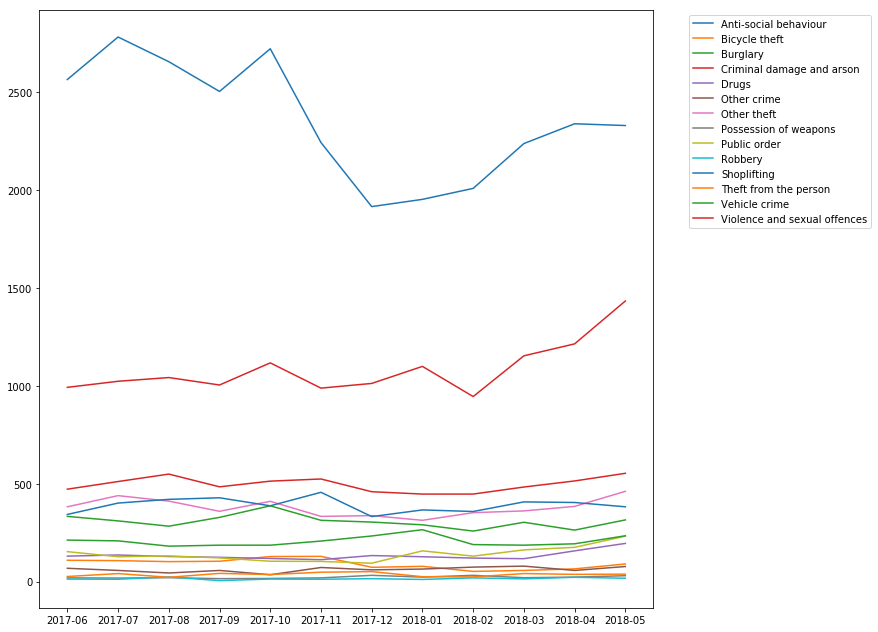

In [50]:
fig = plt.figure(figsize=[11,11])
plt.plot(nycrimes)
plt.legend(list(nycrimes),bbox_to_anchor=(1.05,1))

<h1>Taking stock of the progress made so far</h1>
At this point the table looks confusing as the higher values drown out any detail in the lower values therefore it would be better to have the values split over multiple graphs of value ranges so that nuance can be more easily detected

<h3>List Crime types for easy reference</h3>

In [51]:
list(nycrimes)

['Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences']

In [52]:
plot_monoff = pd.concat([nyoffpm,ukmonoffmean],axis=1,join='inner')
plot_monoff

,Number of offences,uk mean
Month,,
2017-06,5816,12773.5555556
2017-07,6171,13375.6888889
2017-08,6012,12975.8444444
2017-09,5760,12088.8000000
2017-10,6171,13132.8888889
2017-11,5558,12192.0666667
2017-12,5050,11193.8888889
2018-01,5217,11507.1111111
2018-02,5008,10597.2222222


<h2>first plot for report</h2>

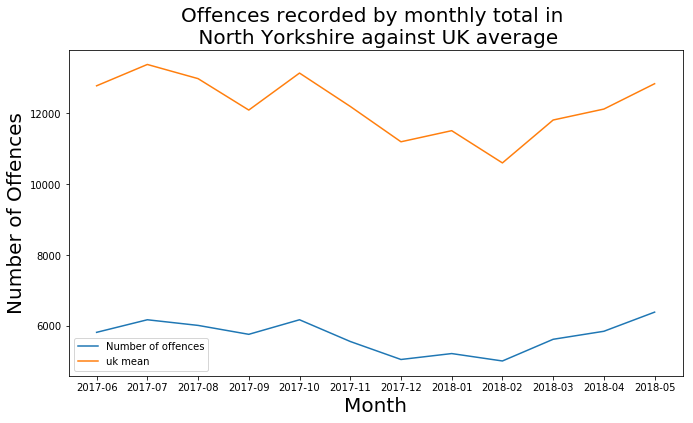

In [53]:
fig1 = plt.figure(figsize=[11,6])
plt.plot(plot_monoff)
plt.legend(list(plot_monoff))
plt.xlabel('Month').set_fontsize(20)
plt.ylabel('Number of Offences').set_fontsize(20)
plt.title("Offences recorded by monthly total in \n North Yorkshire against UK average").set_fontsize(20)
plt.savefig('total_Monthly_crime.png')

In [54]:
plot_off = pd.concat([nytotaloff,ukoffmean],axis=1,join='inner')
plot_off.sort_values('Number of offences',ascending=True, inplace=True)
plot_off

,Number of offences,uk mean
Robbery,177,1739.2666667
Possession of weapons,267,960.2666667
Theft from the person,431,2246.4222222
Other crime,744,2179.0444444
Bicycle theft,1094,2170.0888889
Drugs,1597,3135.2888889
Public order,1689,8935.0888889
Vehicle crime,2480,10295.5777778
Burglary,3687,9709.4444444
Other theft,4542,12146.2444444


<h2>second plot for report</h2>

<Figure size 1080x432 with 0 Axes>

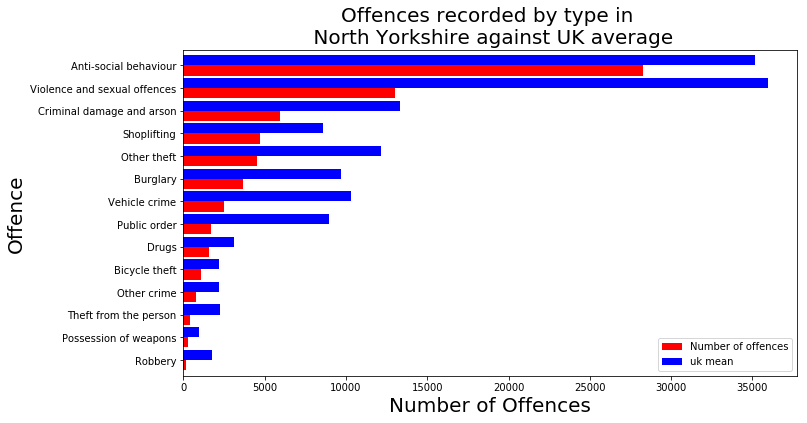

In [55]:
fig1 = plt.figure(figsize=[15,6])
plot_off.plot.barh(width=0.9,color=('r','b'),figsize=(11,6))
plt.legend(list(plot_off))
plt.xlabel('Number of Offences').set_fontsize(20)
plt.ylabel('Offence').set_fontsize(20)
plt.title("Offences recorded by type in \n North Yorkshire against UK average").set_fontsize(20)
plt.savefig('Total_crime.png',bbox_inches = 'tight')

<h3>High crime</h3>

In [56]:
high_crime_df = pd.concat([nycrimes['Anti-social behaviour'],
                           nycrimes['Violence and sexual offences'],
                           ukoffmeanpm['Anti-social behaviour'],
                           ukoffmeanpm['Violence and sexual offences']], 
                          axis=1, keys=['Anti-social behaviour',
                                        'Violence and sexual offences',
                                        'Mean anti-social behaviour',
                                        'Mean violence and sexual offences'])

In [57]:
high_crime_df[:5]

,Anti-social behaviour,Violence and sexual offences,Mean anti-social behaviour,Mean violence and sexual offences
Month,,,,
2017-06,2564,992,3485.5555556,2994.7111111
2017-07,2781,1023,3681.2444444,3121.0000000
2017-08,2655,1042,3578.7555556,2861.2222222
2017-09,2503,1004,3040.7555556,2792.8000000
2017-10,2721,1117,3378.8666667,3042.6666667


<h3>Medium crime</h3>

In [58]:
medium_crime_df = pd.concat([nycrimes['Criminal damage and arson'],
                             nycrimes['Shoplifting'],
                             nycrimes['Other theft'],
                             nycrimes['Burglary'],
                             ukoffmeanpm['Criminal damage and arson'],
                             ukoffmeanpm['Shoplifting'],
                             ukoffmeanpm['Other theft'],
                             ukoffmeanpm['Burglary']], 
                            axis=1, keys=['Criminal damage and arson',
                                          'Shoplifting',
                                          'Other theft',
                                          'Burglary',
                                          'Mean criminal damage and arson',
                                          'Mean shoplifting',
                                          'Mean other theft',
                                          'Mean burglary'])

In [59]:
medium_crime_df[:5]

,Criminal damage and arson,Shoplifting,Other theft,Burglary,Mean criminal damage and arson,Mean shoplifting,Mean other theft,Mean burglary
Month,,,,,,,,
2017-06,472,343,382,333,1115.2222222,712.2888889,1049.1777778,780.3555556
2017-07,511,401,439,310,1163.7777778,723.9333333,1087.3111111,806.2444444
2017-08,549,420,411,283,1170.1555556,751.0444444,1087.4444444,815.1777778
2017-09,484,428,359,328,1077.9555556,710.3111111,1003.6666667,809.4888889
2017-10,513,387,410,387,1248.9111111,732.9555556,1034.8222222,868.1777778


<h3>Low Crime</h3>

In [60]:
low_crime_df = pd.concat([nycrimes['Bicycle theft'],
                         nycrimes['Drugs'],
                         nycrimes['Vehicle crime'],
                         nycrimes['Public order'],
                         ukoffmeanpm['Bicycle theft'],
                         ukoffmeanpm['Drugs'],
                         ukoffmeanpm['Vehicle crime'],
                         ukoffmeanpm['Public order']],
axis=1, keys=['Bicycle theft',
              'Drugs',
              'Vehicle crime',
              'Public order',
              'Mean bicycle theft',
              'Mean drugs',
              'Mean vehicle crime',
              'Mean public order'])

In [61]:
low_crime_df[:5]

,Bicycle theft,Drugs,Vehicle crime,Public order,Mean bicycle theft,Mean drugs,Mean vehicle crime,Mean public order
Month,,,,,,,,
2017-06,109,130,212,153,224.6888889,237.5777778,826.6666667,777.2666667
2017-07,107,136,208,127,245.4444444,265.0444444,849.3333333,821.4000000
2017-08,102,128,181,131,231.9111111,266.8888889,855.6666667,766.1111111
2017-09,104,124,186,121,224.2666667,249.4888889,902.2666667,715.1333333
2017-10,128,118,186,104,225.0666667,274.4000000,933.6444444,772.2444444


<h3>very low crime</h3>

In [62]:
vlow_crime_df =nycrimes[['Other crime','Possession of weapons','Robbery','Theft from the person']]
vlow_crime_df = pd.concat([nycrimes['Other crime'],
                         nycrimes['Possession of weapons'],
                         nycrimes['Robbery'],
                         nycrimes['Theft from the person'],
                         ukoffmeanpm['Other crime'],
                         ukoffmeanpm['Possession of weapons'],
                         ukoffmeanpm['Robbery'],
                         ukoffmeanpm['Theft from the person']],
axis=1, keys=['Other Crime',
              'Possesion of weapons',
              'Robbery',
              'Theft from the person',
              'Mean other crime',
              'Mean possession of weapons',
              'Mean robbery',
              'Mean theft from the person'])

In [63]:
vlow_crime_df[:5]

,Other Crime,Possesion of weapons,Robbery,Theft from the person,Mean other crime,Mean possession of weapons,Mean robbery,Mean theft from the person
Month,,,,,,,,
2017-06,68,19,13,26,175.6444444,81.2444444,132.6666667,180.4888889
2017-07,57,18,12,41,181.0444444,81.9111111,147.2888889,200.7111111
2017-08,44,20,24,22,175.0666667,79.1777778,142.6000000,194.6222222
2017-09,57,15,5,42,174.2666667,75.4222222,138.9777778,174.0000000
2017-10,35,16,13,36,186.3777778,81.0000000,156.2444444,197.5111111


<h1>Plot the diferent visualisations</h1>

<h2>third plot for report</h2>

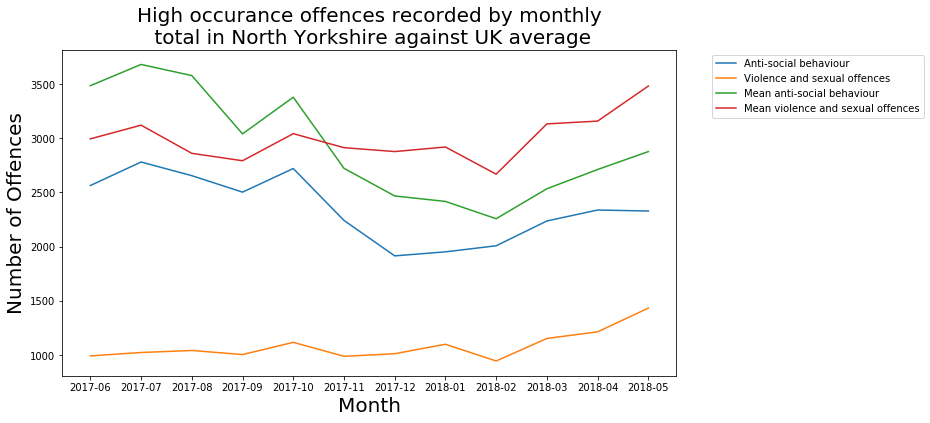

In [64]:
fig = plt.figure(figsize=[11,6])
plt.plot(high_crime_df)
plt.legend(list(high_crime_df),bbox_to_anchor=(1.05,1))
plt.xlabel('Month').set_fontsize(20)
plt.ylabel('Number of Offences').set_fontsize(20)
plt.title("High occurance offences recorded by monthly\n total in North Yorkshire against UK average").set_fontsize(20)
plt.savefig('high_crime.png',bbox_inches = 'tight')

In this chart we see that the Antisocial behaviour spikes in july then october before falling sharply in the winter months to rise again in the spring peeking in april again.
with the violence and sexual offences figures the numbers seem constant until the start of 2018 at which point the spike sharply. further investigation shows this was due to a rise in the reporting of historical offences.


<h2>fourth plot for report</h2>

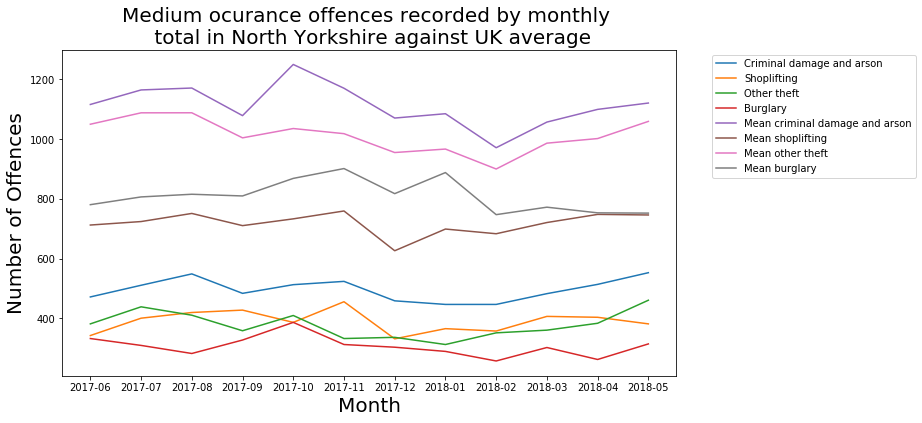

In [65]:
fig = plt.figure(figsize=[11,6])
plt.plot(medium_crime_df)
plt.legend(list(medium_crime_df),bbox_to_anchor=(1.05,1))
plt.xlabel('Month').set_fontsize(20)
plt.ylabel('Number of Offences').set_fontsize(20)
plt.title("Medium ocurance offences recorded by monthly \n total in North Yorkshire against UK average").set_fontsize(20)
plt.savefig('med_crime.png',bbox_inches = 'tight')

observing this graph we can see that criminal damage spikes around august and november with a sharp increase from february onwards in 2018
other theft peaks in july october and rises sharply in 2018
shoplifting peaks sharply in november before dropping sharply and then peaking again in march.
finally burglary stars high in may peaking in october then declining to lower levels in february peaking slightly in march and may

<h2>fifth plot for report</h2>

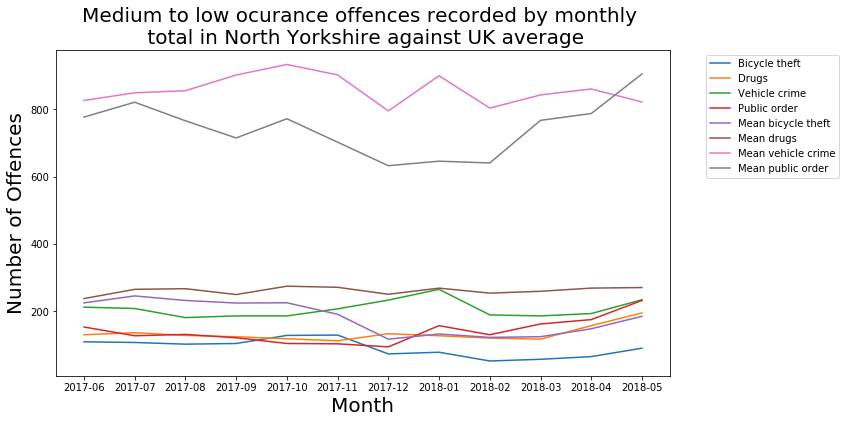

In [66]:
fig = plt.figure(figsize=[11,6])
plt.plot(low_crime_df)
plt.legend(list(low_crime_df),bbox_to_anchor=(1.05,1))
plt.xlabel('Month').set_fontsize(20)
plt.ylabel('Number of Offences').set_fontsize(20)
plt.title("Medium to low ocurance offences recorded by monthly \n total in North Yorkshire against UK average").set_fontsize(20)
plt.savefig('mlow_crime.png',bbox_inches = 'tight')

This graph shows a large spike in vehicle crime upto january including the festive season.
drugs offenses are at a steady value until march then spike sharply until may
public order offenses decline until december then spike sharply in january before spiking even further till may
bicycle theft holds steady until september before rising slightly until november then dropping sharply in the winter months the rising back to previous levels by may

<h2>sixth plot for report</h2>

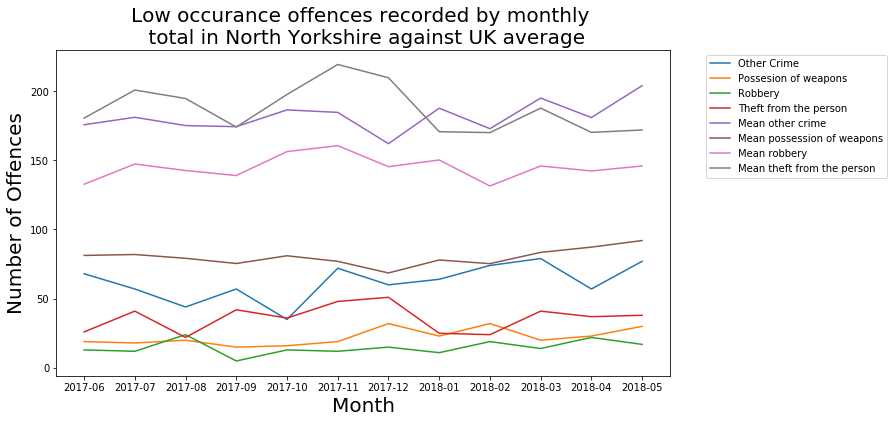

In [67]:
fig = plt.figure(figsize=[11,6])
plt.plot(vlow_crime_df)

plt.legend(list(vlow_crime_df),bbox_to_anchor=(1.05,1))

plt.xlabel('Month').set_fontsize(20)
plt.ylabel('Number of Offences').set_fontsize(20)
plt.title("Low occurance offences recorded by monthly \n total in North Yorkshire against UK average").set_fontsize(20)
plt.savefig('Low_crime.png',bbox_inches = 'tight')

at the lowest level crimes any slight monthly fluctuation would show in a more erratic
robbery is the most consistent.
however there seems to be a similar pattern of spikes as the previous 3 diagrams showing there may be some form of causation especially the spikes in may evident on may of the graphs.

In [68]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu